# KNN Implentation on Digits dataset

Loading libraries

In [6]:
from sklearn import datasets
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, PredefinedSplit
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from datetime import datetime

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

## Load the Digits Dataset


In [7]:
from sklearn.datasets import load_digits
# Loading the Digits dataset
digits = load_digits()

# Print to show the input dimension
print(f"Image Data Shape {digits.data.shape}")

# Print to show the number of labels
print(f"Label Data Shape {digits.target.shape}")

Image Data Shape (1797, 64)
Label Data Shape (1797,)


## Showing the Images and the Labels (Digits Dataset)


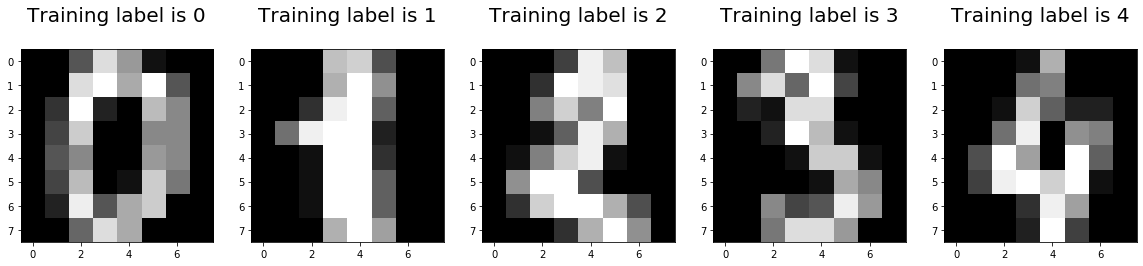

In [8]:
import numpy as np 
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training label is %i\n' % label, fontsize = 20)

## Splitting Data into Training and Test Sets 

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

# Loading the Digits dataset
digits = load_digits()

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)
print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

Train size: 1347
Test size: 450


In [10]:
digits.data.shape

(1797, 64)

## Tracking experiments in a separate log dataframe

In [11]:
experimentLog = pd.DataFrame(columns=["Model", "Dataset", "TrainAcc", "TestAcc", "TrainTime(sec)", "TestTime(sec)", "Param", "Description",])


### Implementing a KNN model on the Digits dataset and tuning parameters using gridsearch 

In [12]:
%%time
from __future__ import print_function

from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, PredefinedSplit
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from datetime import datetime

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#Set style for plotting
sns.set(style="whitegrid", font_scale=1.3)
matplotlib.rcParams["legend.framealpha"] = 1
matplotlib.rcParams["legend.frameon"] = True

knn_sk = KNeighborsClassifier(n_jobs=-1)

n_neighbors_range = list(range(1,6))
p_range = list (range(1,4))
parameters = {'n_neighbors': n_neighbors_range, 'p': p_range}

np.random.seed(42) # for multiple runs of the same model training, you should re-execute this line
scores = ['accuracy']  # limited to accuracuy for now but could use other metrics such as precision, recall, etc.
start_time = datetime.now()   

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    gridSearch = GridSearchCV(estimator=knn_sk, 
                          param_grid=parameters,  
                          cv=5, 
                          #refit=False,  
                          return_train_score=False,
                          verbose=1,
                          n_jobs=-1  #use multiple CPUs; divide and conquer!
                          )
    gridSearch.fit(X_train, y_train)
    print("Best parameters set found on development set:")
    print()
    print(gridSearch.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    print(f'{score}  (+/-stdev*2)     hyper-params')

    means = gridSearch.cv_results_['mean_test_score']  #access elements of the grid search results dictionary
    stds = gridSearch.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, gridSearch.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()
    end_time = datetime.now()
    wallTimeInSecondsTrain = (end_time - start_time).total_seconds()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    start_time = datetime.now()   
    y_true, y_pred = y_test, gridSearch.predict(X_test)
    end_time = datetime.now()
    wallTimeInSecondsTest = (end_time - start_time).total_seconds()
    print(classification_report(y_true, y_pred))  # more detailed breakdown of the test perf; optional for now
    print()
    trainAcc = gridSearch.best_score_ #CV accuracy score for best hyperparameter combo
    
    testAcc  = accuracy_score(y_true, y_pred)
    experimentLog.loc[len(experimentLog)] =["knn", "Digits", f"{trainAcc*100:8.2f}%", f"{testAcc*100:8.2f}%", 
                                    f"{wallTimeInSecondsTrain:8.2f} secs", f"{wallTimeInSecondsTest:8.2f} secs",
                                    f"{gridSearch.best_params_}","5-foldCV-based gridSearch BEST model"]
experimentLog

# Tuning hyper-parameters for accuracy

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.2s


Best parameters set found on development set:

{'n_neighbors': 1, 'p': 2}

Grid scores on development set:

accuracy  (+/-stdev*2)     hyper-params
0.978 (+/-0.005) for {'n_neighbors': 1, 'p': 1}
0.985 (+/-0.015) for {'n_neighbors': 1, 'p': 2}
0.985 (+/-0.008) for {'n_neighbors': 1, 'p': 3}
0.973 (+/-0.012) for {'n_neighbors': 2, 'p': 1}
0.979 (+/-0.010) for {'n_neighbors': 2, 'p': 2}
0.981 (+/-0.008) for {'n_neighbors': 2, 'p': 3}
0.981 (+/-0.009) for {'n_neighbors': 3, 'p': 1}
0.985 (+/-0.005) for {'n_neighbors': 3, 'p': 2}
0.985 (+/-0.008) for {'n_neighbors': 3, 'p': 3}
0.978 (+/-0.013) for {'n_neighbors': 4, 'p': 1}
0.984 (+/-0.013) for {'n_neighbors': 4, 'p': 2}
0.984 (+/-0.014) for {'n_neighbors': 4, 'p': 3}
0.982 (+/-0.018) for {'n_neighbors': 5, 'p': 1}
0.985 (+/-0.014) for {'n_neighbors': 5, 'p': 2}
0.984 (+/-0.013) for {'n_neighbors': 5, 'p': 3}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation s

[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    4.7s finished


,Model,Dataset,TrainAcc,TestAcc,TrainTime(sec),TestTime(sec),Param,Description
0,knn,Digits,98.52%,99.11%,4.82 secs,0.12 secs,"{'n_neighbors': 1, 'p': 2}",5-foldCV-based gridSearch BEST model


In [13]:
experimentLog

,Model,Dataset,TrainAcc,TestAcc,TrainTime(sec),TestTime(sec),Param,Description
0,knn,Digits,98.52%,99.11%,4.82 secs,0.12 secs,"{'n_neighbors': 1, 'p': 2}",5-foldCV-based gridSearch BEST model


In [14]:
print(experimentLog)

  Model Dataset   TrainAcc    TestAcc TrainTime(sec)  TestTime(sec)  \
0   knn  Digits     98.52%     99.11%      4.82 secs      0.12 secs   

                        Param                           Description  
0  {'n_neighbors': 1, 'p': 2}  5-foldCV-based gridSearch BEST model  


### Printing the best parameters found from hyperparameter tuning

In [15]:
best_p = gridSearch.best_params_["p"]
best_n = gridSearch.best_params_["n_neighbors"]
print("best_p: ",best_p)
print("best_n: ",best_n)

best_p:  2
best_n:  1


## Analysis

1.We explored a grid of 3x5 (15 experiments) and carried cross fold validation with 5 folds.

2.Based on these accuracy scores the best hyperparamters are ` 'n_neighbors': 1, 'p': 2` with an accuracy of **0.985** (`98.52%` accuracy). 

3.This accuracy is very similar to than other hyperparamter combinations. However, one could dispute that 98.52 is not that different to 98.5. In practice, we might choose the simpler model (so happens to be 1-neighbors solution here) as it is cheaper to compute even it was not the best performer. 

## Visualize the performance metrics along each hyperparameter


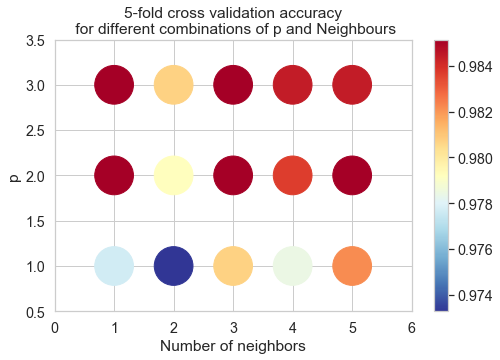

In [17]:
plt.figure(figsize=(8, 5))
sc = plt.scatter(gridSearch.cv_results_["param_n_neighbors"], 
                 gridSearch.cv_results_["param_p"], 
                 c=gridSearch.cv_results_["mean_test_score"], 
                 cmap = plt.get_cmap("RdYlBu_r"), 
                 s=1500)
plt.colorbar(sc)
plt.grid(True)
plt.gca().set_axisbelow(True)
plt.xlabel("Number of neighbors")
plt.ylabel("p")
plt.title("5-fold cross validation accuracy\n for different combinations of p and Neighbours")
plt.xlim([0, 6])
plt.ylim([0.5, 3.5]);

In [18]:
p_idx = gridSearch.cv_results_["param_p"].data == best_p

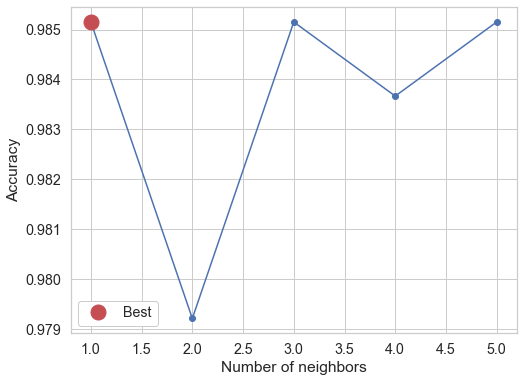

In [19]:
plt.figure(figsize=(8,6))
plt.plot(gridSearch.cv_results_["param_n_neighbors"].data[p_idx], 
         gridSearch.cv_results_["mean_test_score"][p_idx], 
         "o-")
plt.plot([best_n], [gridSearch.cv_results_["mean_test_score"][p_idx][best_n - 1]], "or", markersize=15, label="Best")
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.title("")
plt.grid(True)
plt.legend(numpoints=1)
plt.show()

## Results

In [20]:
experimentLog

,Model,Dataset,TrainAcc,TestAcc,TrainTime(sec),TestTime(sec),Param,Description
0,knn,Digits,98.52%,99.11%,4.82 secs,0.12 secs,"{'n_neighbors': 1, 'p': 2}",5-foldCV-based gridSearch BEST model
